In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import os
# print(os.getcwd())

train_df = pd.read_csv('../../../이적료_예측/FIFA_train.csv', encoding='utf-8')
train_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [3]:
test_df = pd.read_csv('../../../이적료_예측/FIFA_test.csv', encoding='utf-8')
test_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


### 결측치 확인

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


### 전체 이적료의 분포 확인

(array([8.478e+03, 3.120e+02, 7.400e+01, 3.000e+01, 2.000e+01, 1.100e+01,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+04, 1.1059e+07, 2.2108e+07, 3.3157e+07, 4.4206e+07,
        5.5255e+07, 6.6304e+07, 7.7353e+07, 8.8402e+07, 9.9451e+07,
        1.1050e+08]),
 <BarContainer object of 10 artists>)

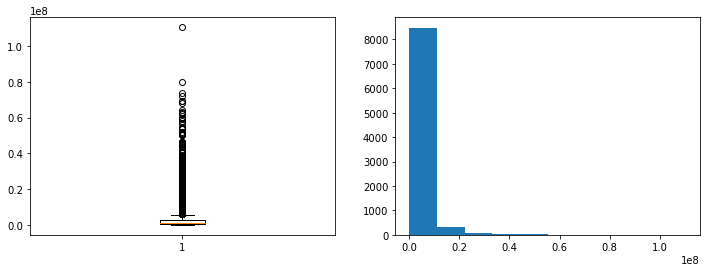

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax1 = plt.subplot(1,2,1)
ax1.boxplot(train_df['value'])

ax2 = plt.subplot(1,2,2)
ax2.hist(train_df['value'])

- 10,000,000 ~ 100,000,000  이상치 데이터가 존재해서 분포의 모형을 정확히 파악하기 힘듬  
 --> 해당 데이터를 제외한 나머지 데이터의 분포를 확인

In [7]:
train_df['value'].describe()

count    8.932000e+03
mean     2.778673e+06
std      5.840982e+06
min      1.000000e+04
25%      3.750000e+05
50%      8.250000e+05
75%      2.600000e+06
max      1.105000e+08
Name: value, dtype: float64

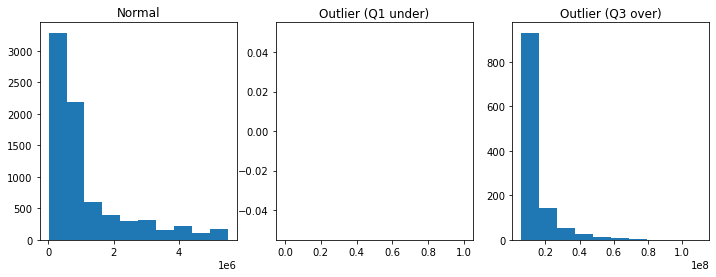

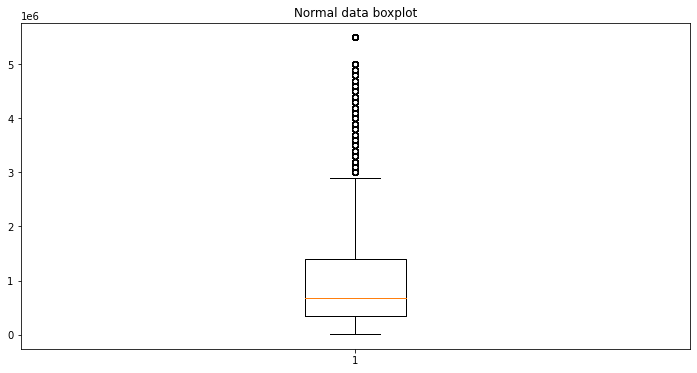

In [8]:
Q1 = train_df['value'].describe()['25%'] # 계약금의 1분위수
Q3 = train_df['value'].describe()['75%'] # 계약금의 3분위수
IQR = Q3-Q1

# 이상치를 제외한 데이터 확인
temp = train_df.loc[(train_df['value'] > (Q1 - 1.5*IQR)) & (train_df['value'] < (Q3 + 1.5*IQR)),:]
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax1 = plt.subplot(1,3,1)
ax1.hist(temp['value'])
ax1.set_title('Normal')


# 이상치 데이터
outlier_1 = train_df.loc[(train_df['value'] < (Q1 - 1.5*IQR)),:]
outlier_2 = train_df.loc[(train_df['value'] > (Q3 + 1.5*IQR)),:]
ax2 = plt.subplot(1,3,2)
ax2.hist(outlier_1['value'])
ax2.set_title('Outlier (Q1 under)')

ax3 = plt.subplot(1,3,3)
ax3.hist(outlier_2['value'])
ax3.set_title('Outlier (Q3 over)')

# 정상데이터 분포 확인
plt.figure(figsize=(12,6))
plt.boxplot(temp['value'])
plt.title('Normal data boxplot')
plt.show()

- Q1 under 인 이상치는 존재하지 않음

### 이상치 데이터와 정상 데이터의 통계치를 비교

In [9]:
print('< Normal > \n')
temp.describe()

< Normal > 



,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7.754000e+03
mean,9006.890508,25.093113,1.045654,65.447253,70.656177,2.312097,1.158449e+06
std,4329.654204,4.779718,0.230478,5.633125,5.035068,0.713302,1.252783e+06
min,41.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,5287.250000,21.000000,1.000000,62.000000,67.000000,2.000000,3.500000e+05
50%,8749.500000,25.000000,1.000000,66.000000,71.000000,2.000000,6.750000e+05
75%,12701.750000,29.000000,1.000000,70.000000,74.000000,3.000000,1.400000e+06
max,16948.000000,40.000000,4.000000,88.000000,89.000000,5.000000,5.500000e+06


In [10]:
print('\n< Outlier (Q3 over) > \n')
outlier_2.describe()


< Outlier (Q3 over) > 



,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1.178000e+03
mean,1120.383701,25.972835,1.691851,77.911715,80.824278,2.991511,1.344355e+07
std,745.981972,3.448262,0.806274,3.542054,3.906580,0.904024,1.083557e+07
min,0.000000,17.000000,1.000000,72.000000,74.000000,1.000000,6.000000e+06
25%,495.250000,23.000000,1.000000,75.000000,78.000000,2.000000,7.500000e+06
50%,1018.500000,26.000000,2.000000,77.000000,80.000000,3.000000,9.500000e+06
75%,1683.000000,28.000000,2.000000,80.000000,83.000000,4.000000,1.450000e+07
max,3641.000000,37.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


#### 정상치 vs 이상치
- 수 : 7754 vs 1178
- age : 정상치 데이터의 폭이 넓고, 표준편차 또한 크다
- reput : 정상치의 경우 평점 5점 존재 x, 정상치의 평균이 1.04점, 표준편차가 0.23으로 이상치 보다 평균, 표준편차 모두 낮다.
- status : 정상치 보다 이상치에서 일반적으로 더 높은 status을 가지고 있는 것으로 보인다
- value : 최고 금액은 약 11억 유로이다.

<AxesSubplot:>

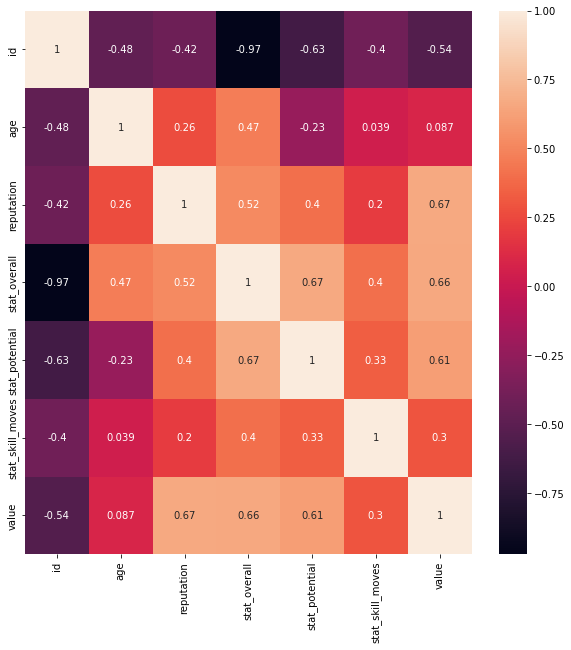

In [11]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True)

- stat_potential, stat_overall 둘 간의 공분산성이 높음
- reputation, stat_overall, stat_potential 과 양의 선형적 관계를 가진다.
- age 변수와는 어떤 선형적 관계도 가지지 않는다.

### 각 변수의 성분 파악

In [12]:
for i in train_df.columns:
    if i in ['id', 'name', 'stat_overall', 'stat_potential', 'value']:
        continue
    print('< {} >'.format(i))
    print(sorted(train_df[i].unique()), '\n')

< age >
[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40] 

< continent >
['africa', 'asia', 'europe', 'oceania', 'south america'] 

< contract_until >
['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', 'Dec 31, 2018', 'Jan 1, 2019', 'Jan 12, 2019', 'Jan 31, 2019', 'Jun 30, 2019', 'Jun 30, 2020', 'May 31, 2019', 'May 31, 2020'] 

< position >
['DF', 'GK', 'MF', 'ST'] 

< prefer_foot >
['left', 'right'] 

< reputation >
[1.0, 2.0, 3.0, 4.0, 5.0] 

< stat_skill_moves >
[1.0, 2.0, 3.0, 4.0, 5.0] 



- id : 예측과 관련 없는 변수이므로 삭제
- name : 예측에 필요한 부분이 있을지 추가적으로 EDA 필요
- age : 16~40세 안에 분포
- contact_until : 계약 만료기간 변수를 확인한 결과, 단순히 년도가 아닌 월,일까지 표기된 몇몇 항목들이 존재한다. (추가로 전처리가 필요할 것으로 판단)
- position : 4가지 포지션으로 정의돼있음
- prefer_foot : 주 발로, 이상치 혹은 결측치가 없어 단순 사용해도 될듯
- reputation, stat_skill_moves : 1~5점으로 구성

In [13]:
# contract_until 변수에서 년도만 추출
train_df['contract_until_year'] = train_df['contract_until'].apply(lambda x:x[-4:])
# id , contract_unitl 변수 제외
train_df = train_df.drop(['id', 'contract_until'], axis=1)

train_df

,name,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_until_year
0,L. Messi,31,south america,ST,left,5.0,94,94,4.0,110500000.0,2021
1,De Gea,27,europe,GK,right,4.0,91,93,1.0,72000000.0,2020
2,L. Suárez,31,south america,ST,right,5.0,91,91,3.0,80000000.0,2021
3,Sergio Ramos,32,europe,DF,right,4.0,91,91,3.0,51000000.0,2020
4,J. Oblak,25,europe,GK,right,3.0,90,93,1.0,68000000.0,2021
...,...,...,...,...,...,...,...,...,...,...,...
8927,S. Adewusi,18,africa,MF,right,1.0,48,63,3.0,60000.0,2019
8928,C. Ehlich,19,europe,DF,right,1.0,47,59,2.0,40000.0,2020
8929,N. Fuentes,18,south america,DF,right,1.0,47,64,2.0,50000.0,2021
8930,J. Milli,18,europe,GK,right,1.0,47,65,1.0,50000.0,2021


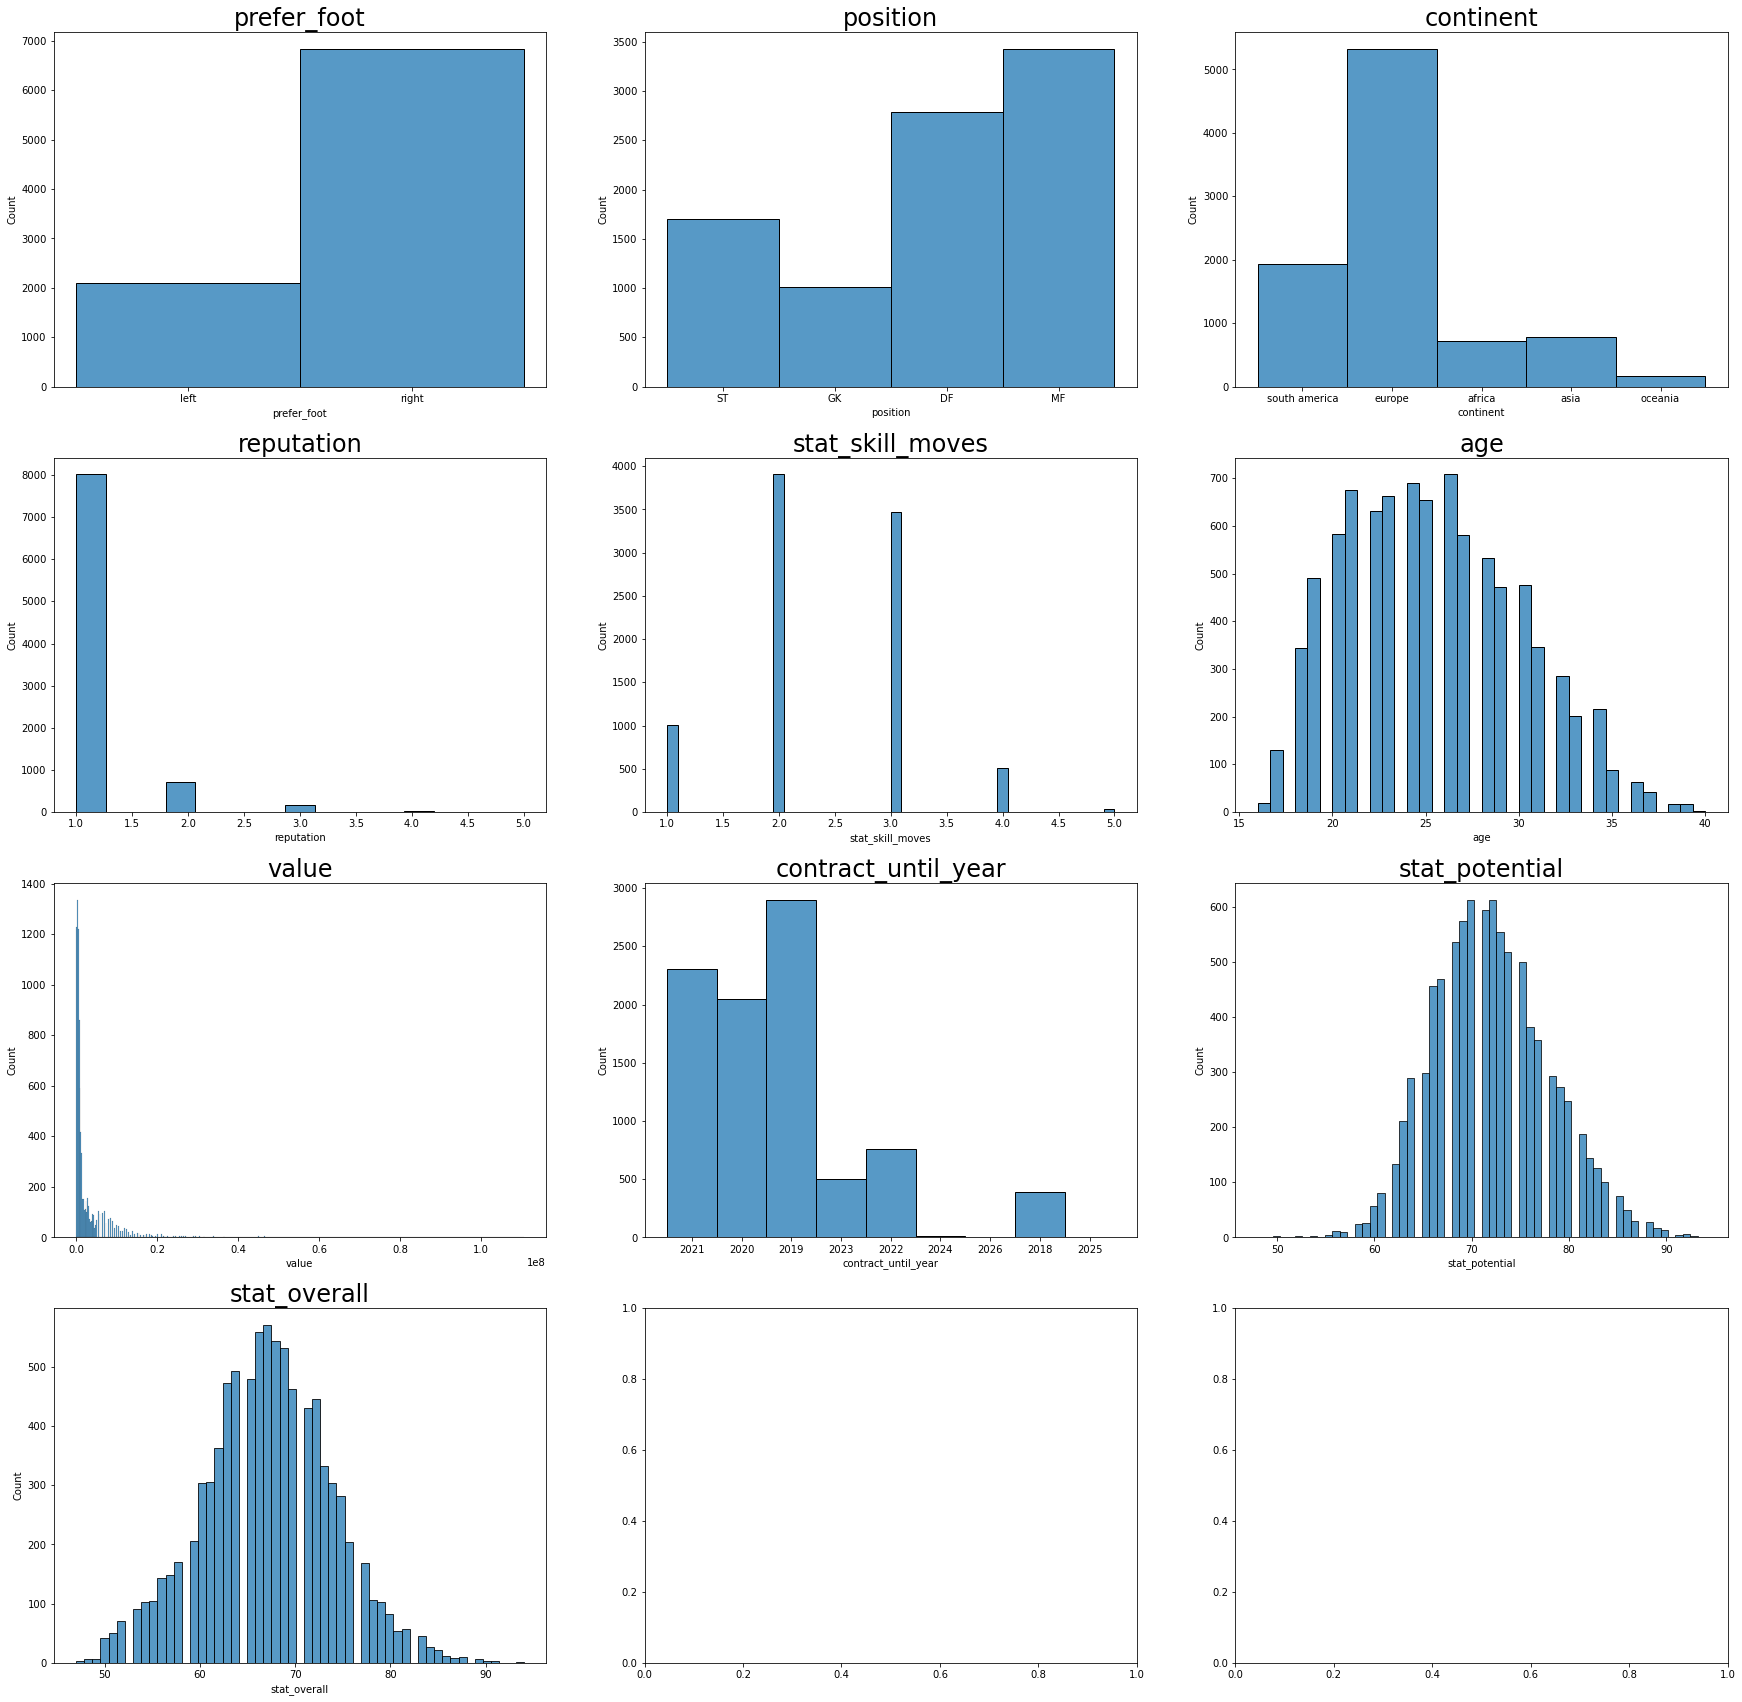

In [14]:
f, axes = plt.subplots(4,3, figsize=(30,30))
axes = axes.flatten()
for col, ax in zip(set(train_df.columns)-set(['name']), axes):
    sns.histplot(data = train_df, x=col, ax=ax)
    ax.set_title(label=col, fontsize=24)
plt.show()

- age 변수의 경우 정규분포 개형보다 조금 왼쪽으로 치우쳐져있다.
- 개인기 능력치는 대부분의 분포가 2,3점에 집중돼있다.
- stat_potential, stat_overall 의 경우 데이터의 분포가 정규분포의 개형을 따른다
- europe 선수가 다른 대륙 선수보다 많다
- 대부분의 선수들은 주발이 오른발이다
- reputation은 대부분 1점이다.
- 대부분의 선수들이 10,000,000 유로 이하의 금액을 받는다.
- 가장 많은 선수가 분포한 포지션은 MF, 적은 포지션은 GK이다.

### 각 범주형 변수형과 이적료

In [15]:
cate = ['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves', 'contract_until_year']
features = {i:[] for i in cate}
features_idx = {i:[] for i in cate}

for i in cate:
    temp = train_df.groupby(i)['value'].agg(np.mean)
    features[i] = temp.values
    features_idx[i] = temp.index

print(features)
print(features_idx)

{'continent': array([2972246.87933426, 1035146.12452351, 2928124.76512589,
        822542.85714286, 3183204.46289569]), 'position': array([2304347.90397707, 1992073.41269841, 3121761.96032672,
       3330360.70381232]), 'prefer_foot': array([2865231.50357995, 2752150.06581834]), 'reputation': array([ 1690091.71449963,  8639220.9631728 , 22014830.50847458,
       33429032.25806452, 60625000.        ]), 'stat_skill_moves': array([ 1992073.41269841,  1448797.69526248,  3128878.49121797,
       11000679.61165049, 20051612.90322581]), 'contract_until_year': array([ 1286406.64961637,  1746122.80096585,  2397035.59239395,
        2827543.32755633,  5899073.58738502,  5802114.62450593,
       24508333.33333333, 14053333.33333333, 50500000.        ])}
{'continent': Index(['africa', 'asia', 'europe', 'oceania', 'south america'], dtype='object', name='continent'), 'position': Index(['DF', 'GK', 'MF', 'ST'], dtype='object', name='position'), 'prefer_foot': Index(['left', 'right'], dtype='object', 

C:\Users\dydgm\AppData\Local\Temp\ipykernel_12500\1632642327.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=features_idx[i], rotation=45)
C:\Users\dydgm\AppData\Local\Temp\ipykernel_12500\1632642327.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=features_idx[i], rotation=45)
C:\Users\dydgm\AppData\Local\Temp\ipykernel_12500\1632642327.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=features_idx[i], rotation=45)
C:\Users\dydgm\AppData\Local\Temp\ipykernel_12500\1632642327.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=features_idx[i], rotation=45)


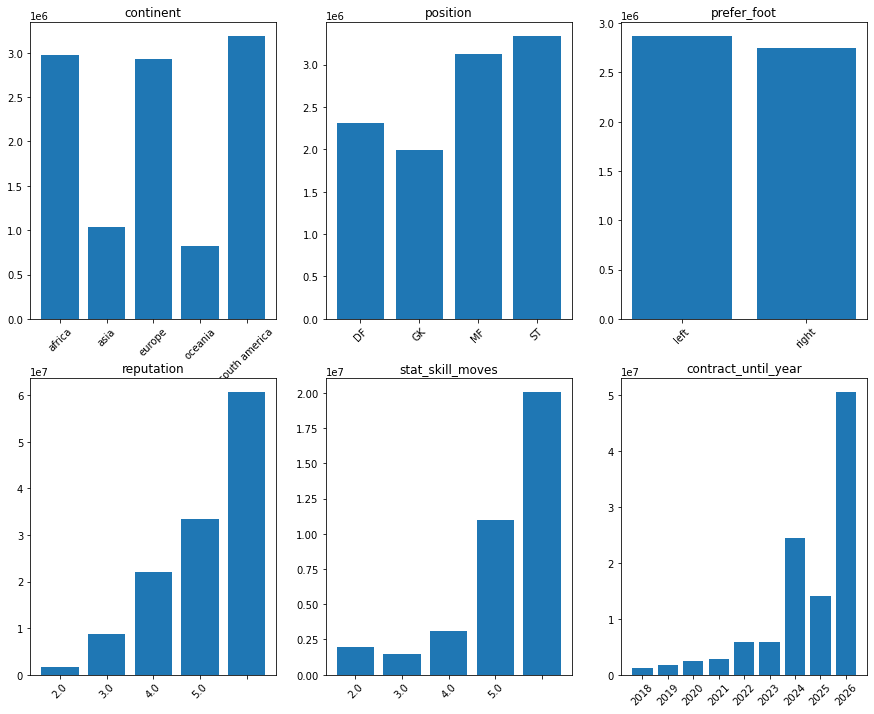

In [16]:
fig, ax = plt.subplots(2,3,figsize=(15,12))
no = 1

for i in cate:
    ax = plt.subplot(2,3,no)
    ax.bar(features_idx[i], features[i])
    ax.set_xticklabels(labels=features_idx[i], rotation=45)
    ax.set_title(i, fontsize=12)
    no += 1

- ascia, oceania 대륙의 선수들이 대체적으로 몸값이 적음을 확인
- ST, MF 가 DF, GK 보다 몸값이 큼을 확인
- 주발은 이적료에 큰 영향을 끼치지 않음을 확인


### 변수간의 관계 시각화

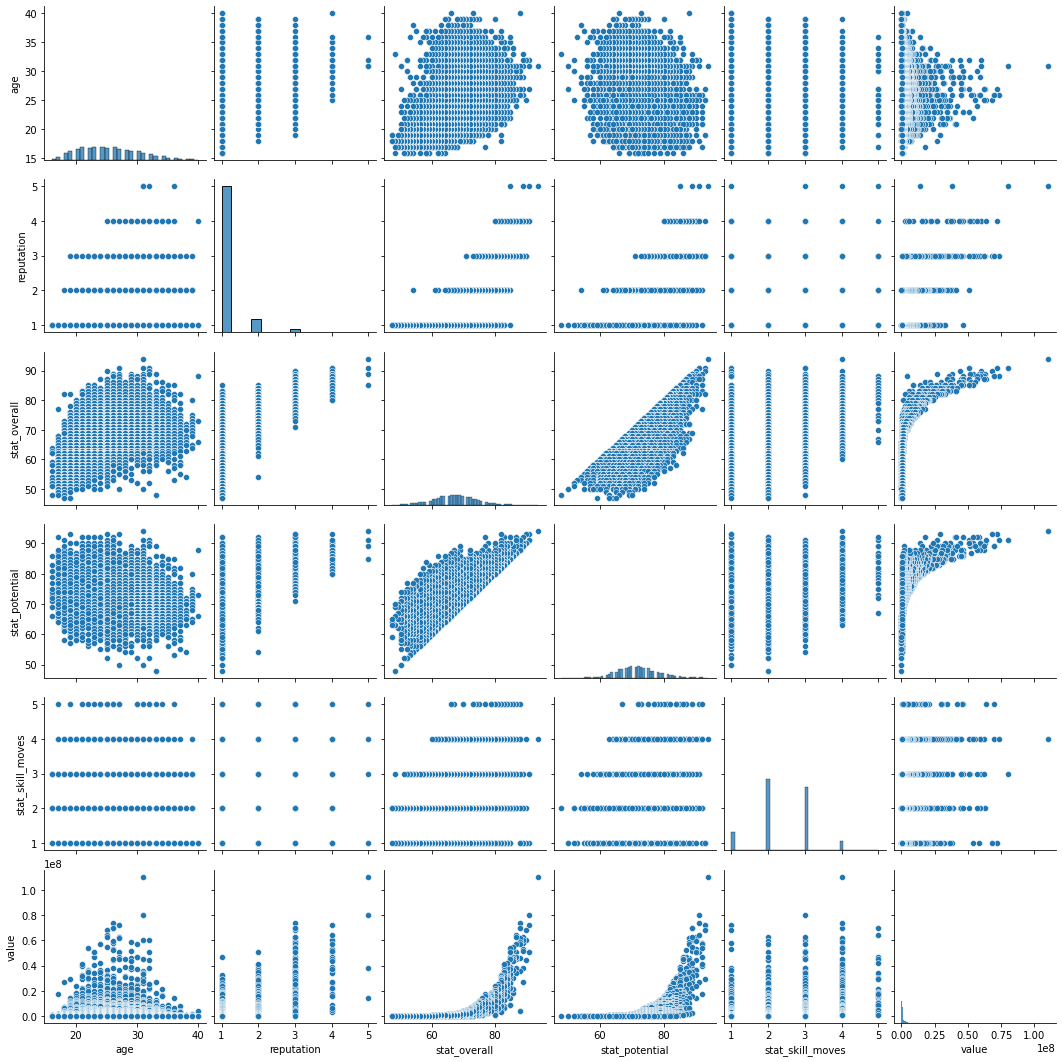

In [17]:
sns.pairplot(train_df)

- age 와 stat_overall 을 봤을 때, age가 20~30 정도일 때가 가장 높은 선수기량을 보여준다는 사실을 확인
- 개인기 5점인 선수는 너무 어리거나 너무 나이가 들지 않음
- 결국 선수기량이 가장 높은 20~30 의 나이의 선수가 가장 높은 이적료를 받음
